<a href="https://colab.research.google.com/github/mwelland/ENGPYHS_3NM4/blob/main/Assignments/Assignment_2_answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 2
Due EOD Monday Sept 23

#Question 1

Consider the spring system with spring constants and forces on blocks 1 and 4 noted.

* How are you setting up the system?
* How many equations do you have? Do you have to worry about the end-points?
* What would you have to do if we added another block in the chain?
* What does the absolute tolerance mean?
* How does Gauss-Seidel work?
* How would you do relative tolerance? -or- what other solver could you use?

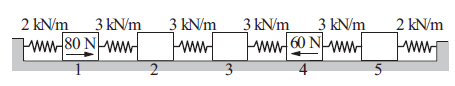

## a) Write out the equilibrium equations for the positions of the blocks, and form a linear system.
{answer}


\begin{align}
3[x_2-x_1] - 2 x_1 &= -.08 \\
3[x_3-x_2]-3 [x_2-x_1] &= 0 \\
3[x_4-x_3] - 3[x_3-x_2] &= 0 \\
3[x_5-x_4] - 3[x_4-x_3] &= .06 \\
-2 x_5-3[x_5-x_4] &= 0
\end{align}


$\begin{bmatrix}
-5 &  3 &  0 &  0 &  0 \\
 3 & -6 &  3 &  0 &  0 \\
 0 &  3 & -6 &  3 &  0 \\
 0 &  0 &  3 & -6 &  3 \\
 0 &  0 &  0 &  3 & -5 \\
\end{bmatrix}
\begin{bmatrix}
x_1 \\
  x_2 \\
  x_3 \\
 x_4 \\
  x_5 \\
\end{bmatrix}
=\begin{bmatrix}
-.08 \\
  0 \\
  0 \\
 .06 \\
  0 \\
\end{bmatrix}
$


##b) Use Gauss-Seidel iterations to solve this system. Use an absolute tolerance on the residual's Frobenius norm of 1e-4 to determine convergence. Report the solution and the number of iterations required.
{method, implementation, answer}

In [3]:
import numpy as np
A = np.array([[-5, 3, 0, 0, 0],
              [3, -6, 3, 0, 0],
              [0, 3, -6, 3, 0],
              [0, 0, 3, -6, 3],
              [0, 0, 0, 3, -5]])
b = np.array([-.08, 0, 0, .06, 0])
x0 = np.array([0., 0., 0., 0., 0.])

import numpy as np
def gauss_seidel_step(A, b, x):
  """Performs a single Gauss-Seidel iteration step.

  Args:
    A: The coefficient matrix.
    b: The right-hand side vector.
    x: The current solution vector.

  Returns:
    The updated solution vector.
  """

  n = len(x)
  for i in range(n):
    x[i] = (b[i] - np.dot(A[i, :i], x[:i]) - np.dot(A[i, i + 1:], x[i + 1:])) / A[i, i]
  return x

np.set_printoptions(precision=4)

print('The true answer is: \n', np.linalg.solve(A, b), '\n')
for i in range(100):
  x0 = gauss_seidel_step(A, b, x0)
  residual = np.dot(A, x0) - b
  print(f'Iteration {i + 1}: x = {x0}, residual = {np.linalg.norm(residual)}')
  if np.linalg.norm(residual) < 1e-4:
    break



The true answer is: 
 [ 0.0207  0.0079 -0.005  -0.0179 -0.0107] 

Iteration 1: x = [ 0.016   0.008   0.004  -0.008  -0.0048], residual = 0.03877318661136843
Iteration 2: x = [ 0.0208  0.0124  0.0022 -0.0113 -0.0068], residual = 0.018349212517162695
Iteration 3: x = [ 0.0234  0.0128  0.0008 -0.013  -0.0078], residual = 0.007486052631393921
Iteration 4: x = [ 0.0237  0.0122 -0.0004 -0.0141 -0.0085], residual = 0.005443816036568459
Iteration 5: x = [ 0.0233  0.0115 -0.0013 -0.0149 -0.0089], residual = 0.004511561847076901
Iteration 6: x = [ 0.0229  0.0108 -0.0021 -0.0155 -0.0093], residual = 0.0036904222227414577
Iteration 7: x = [ 0.0225  0.0102 -0.0026 -0.016  -0.0096], residual = 0.0029802450023355275
Iteration 8: x = [ 0.0221  0.0097 -0.0031 -0.0163 -0.0098], residual = 0.00239295366968123
Iteration 9: x = [ 0.0218  0.0094 -0.0035 -0.0166 -0.01  ], residual = 0.001917032973115092
Iteration 10: x = [ 0.0216  0.0091 -0.0038 -0.0169 -0.0101], residual = 0.001534432170703256
Iteration 11:

# Question 2

You have a new nuclear fuel type which is an infinite square bar, 1m in edge length. Its thermal conducitivity is $k = 2 W/m^2$. During irradiation, it generate fission heat $Q  = 1 kW/m^3$ and is cooled with heat pipes which keep the surface temperature exactly $100\ ^0C$.

Reminder: The steady-state heat transport equation is:
$-\nabla \cdot [-k \nabla T] = Q$

Discussion
* Have you seen this type of problem before? (Yes, in the lecture!)
* How are you going about solving it? (Using the function in Lecture 6, generate a *sparse* matrix, and LU solve)
* How would you go about changing the surface temperature 50C? (Either change the boundary condition field in the code, or since the boundary is the same everywhere, just add 50)
* What does it mean to halve the mesh size? (double the number of variables in each direction, increase problem size by x4)
* How was your experience with iterative solvers? (Slower for this case than LU)
* What was your experience with ILU preconditioning? (Terrible - didn't even converge despite the big benefit in the lecture!)

## a) Discretize the problem with a 100x100 mesh and find the maximum temperature in steady state.
{method, implementation, answer}


Answer:


Rewrite the equation to make it a Laplacian:  $\nabla\cdot\nabla T =\Delta T = Q/k$.

The boundary condition (100C all around) can be handled in 2 ways: Solve for boundary = 0 and just add 100 (since it is a linear equation), or they will have to dig in to the code and modify it there.

Use the Discrete Laplacian tool from Lecture 6 to generate the matrix:

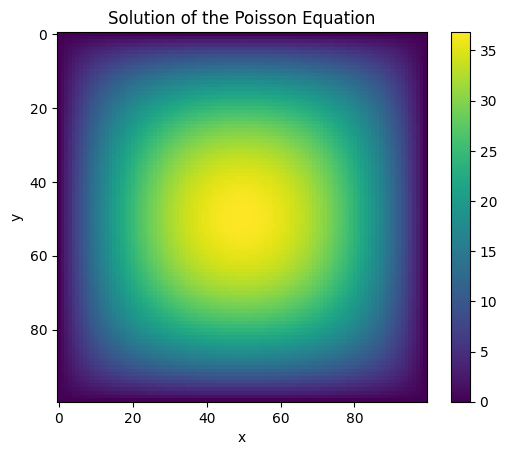

The maximum is  36.826339414259834
This is in excess of the boundary condition 300C. Therefore the maximal temperature is 336.82


In [4]:
import numpy as np
from scipy.sparse import coo_matrix
import scipy as sp

def discretise_poisson(N, Q):
    """Generate the matrix and rhs associated with the discrete Poisson operator."""

    nelements = 5 * N**2 - 16 * N + 16

    row_ind = np.empty(nelements, dtype=np.float64)
    col_ind = np.empty(nelements, dtype=np.float64)
    data = np.empty(nelements, dtype=np.float64)

    f = np.empty(N * N, dtype=np.float64)

    count = 0
    for j in range(N):
        for i in range(N):
            if i == 0 or i == N - 1 or j == 0 or j == N - 1:
                row_ind[count] = col_ind[count] = j * N + i
                data[count] =  1
                f[j * N + i] = 0 #This is the boundary condition, change between 100 or 0
                count += 1

            else:
                row_ind[count : count + 5] = j * N + i
                col_ind[count] = j * N + i
                col_ind[count + 1] = j * N + i + 1
                col_ind[count + 2] = j * N + i - 1
                col_ind[count + 3] = (j + 1) * N + i
                col_ind[count + 4] = (j - 1) * N + i

                data[count] = 4 * (N - 1)**2
                data[count + 1 : count + 5] = - (N - 1)**2
                f[j * N + i] = Q

                count += 5

    return coo_matrix((data, (row_ind, col_ind)), shape=(N**2, N**2)).tocsr(), f

N = 100
# Generate the linear system with N=100, and Q = 1000/2
A, f = discretise_poisson(N=N, Q=1000/2)

# Solve the linear system - They can use a direct solver or an iterative solver for this size.
import scipy.sparse.linalg as spla
x = spla.spsolve(A, f)


import matplotlib.pyplot as plt

# Assuming x contains the solution obtained with preconditioning
solution = x.reshape(N, N)

plt.imshow(solution, cmap='viridis')
plt.colorbar()
plt.title('Solution of the Poisson Equation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print("The maximum is ", np.max(solution))
print("This is in excess of the boundary condition 300C. Therefore the maximal temperature is 336.82")


## b) Ideally, your solution will be independant of your mesh size. Conduct a *mesh sensativity analysis* (which means to halve the mesh size and rerun) to check if your solution depend on your discretization. Use an iterative method and comment on the effectiveness of an ILU preconditioner.

{method, implementation, answer}

<ipython-input-5-dc1a4cb0765f>:8: SparseEfficiencyWarning: spilu converted its input to CSC format
  ilu = spilu(A, fill_factor=20, drop_rule='dynamic')


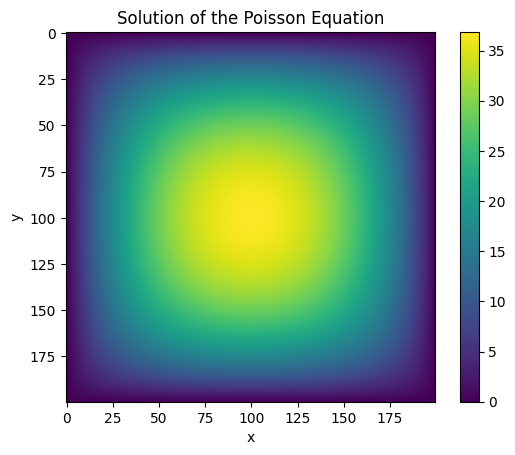

The maximum is  36.83286684075964


In [5]:
N = 200
# Generate the linear system with N=100, and Q = 1000/2
A, f = discretise_poisson(N=N, Q=1000/2)

# Solve the linear system
from scipy.sparse.linalg import splu,  spilu, gmres, LinearOperator

ilu = spilu(A, fill_factor=20, drop_rule='dynamic')

M = LinearOperator(matvec=ilu.solve, shape=(N**2, N**2), dtype=np.float64)

#x = spla.spsolve(A, f) #In this case, a direct solver still works faster!
#x, _ = gmres(A, f, M = M)  # The preconditioned system actually takes (much) longer to solve!
x, _ = gmres(A, f)  #The unpreconditioned iterative method works in a timely fashion although not as fast as direct.


import matplotlib.pyplot as plt

# Assuming x contains the solution obtained with preconditioning
solution = x.reshape(N, N)

plt.imshow(solution, cmap='viridis')
plt.colorbar()
plt.title('Solution of the Poisson Equation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print("The maximum is ", np.max(solution))

Answer

Answer